#Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/KU"
%cd /content/drive/MyDrive/KU

BDDC  fasterrcnn.ipynb	mmdetection  yolov5
/content/drive/MyDrive/KU


## Setup MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html


# !git clone https://github.com/open-mmlab/mmdetection.git 
%cd /content/drive/MyDrive/KU/mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:48tcmalloc: large alloc 1147494400 bytes == 0x56312da4c000 @  0x7fdf370ce615 0x5630f389117c 0x5630f397147a 0x5630f3893f9d 0x5630f3985d4d 0x5630f3907ec8 0x5630f3902a2e 0x5630f389588a 0x5630f3907d30 0x5630f3902a2e 0x5630f389588a 0x5630f3904719 0x5630f3986b76 0x5630f3903d95 0x5630f3986b76 0x5630f3903d95 0x5630f3986b76 0x5630f3903d95 0x5630f3895ce9 0x5630f38d9579 0x5630f3894902 0x5630f3907c4d 0x5630f3902a2e 0x5630f389588a 0x5630f3904719 0x5630f3902a2e 0x5630f389588a 0x5630f39038f6 0x5630f38957aa 0x5630f3903b4f 0x5630f3902a2e
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:15tcmalloc: large alloc 1434370048 bytes == 0x5631720a2000 @  0x7fdf370ce615 0x5630f389117c 0x5630f397147a 0x5630f3893f9d 0x5630f3985d4d 0x5630f3907ec8 0x5630f3902a2e 0x5630f389588a 0x5630f3907d30 0x5630f3902a2e 0x5630f389588a 0x5630f3904719 0x5630f3986b76 0x5630f3903d

In [ ]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla T4',
 'MMCV': '1.4.8',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Build cuda_11.1.TC455_06.29190527_0',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86\n  - CuDNN 

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection

/content/drive/MyDrive/KU/mmdetection


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.22.0
11.1
GCC 7.3


## Train A Detector on A Customized Dataset





In [ ]:
dataset_path = "/content/drive/MyDrive/KU/datasets/train/"

In [ ]:
# Install tree first
!apt-get -q install tree
!tree datasetsx/train

In [ ]:
# !rm -rf /content/drive/MyDrive/KU/yanlıs/work_dirs

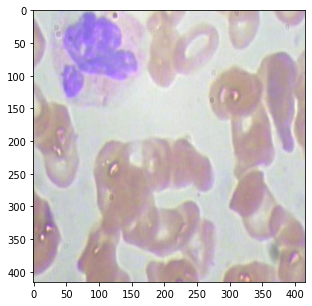

(416, 416, 3)


In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/MyDrive/KU/mmdetection/data/coco/train/BloodImage_00001_jpg.rf.a1b412d0ef5b688d857f7ed28799bf85.jpg')
plt.figure(figsize=(10, 5))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

print(img.shape)

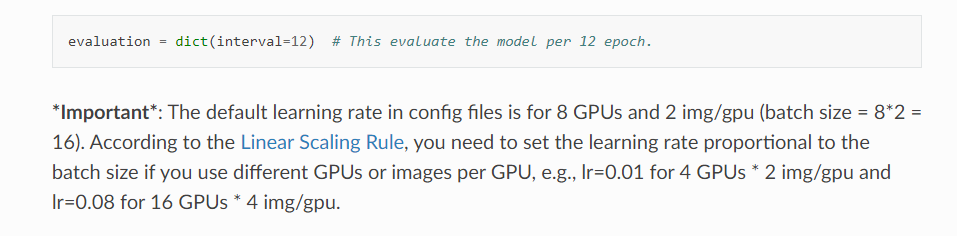

In [ ]:
!python tools/train.py /content/drive/MyDrive/KU/mmdetection/configs/_base_/default_runtime.py

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-29 05:35:07,821 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1

In [ ]:
!python tools/test.py \
    /content/drive/MyDrive/KU/mmdetection/configs/_base_/default_runtime.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/epoch_12.pth \
    --show-dir cascade_results

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/epoch_12.pth
[                                                  ] 0/36, elapsed: 0s, ETA:/usr/local/lib/py

### ensemble trying..

In [ ]:
!pip install ensemble-boxes

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection/

/content/drive/MyDrive/KU/mmdetection


In [ ]:
!bash /content/drive/MyDrive/KU/mmdetection/tools/dist_test.sh \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/default_runtime.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/epoch_12.pth \
    1 \
    --format-only \
    --options "jsonfile_prefix=./cascad"

!bash /content/drive/MyDrive/KU/mmdetection/tools/dist_test.sh \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/deformable_config.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/epoch_12.pth \
    1 \
    --format-only \
    --options "jsonfile_prefix=./deform"

!bash /content/drive/MyDrive/KU/mmdetection/tools/dist_test.sh \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/pisa_model_config.py\
    /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/latest.pth \
    1 \
    --format-only \
    --options "jsonfile_prefix=./pis"

/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:164: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  "The module torch.distributed.launch is deprecated "
The module torch.distributed.launch is deprecated and going to be removed in future.Migrate to torch.distributed.run
 Please read local_rank from `os.environ('LOCAL_RANK')` instead.
INFO:torch.distributed.launcher.api:Starting elastic_operator with launch configs:
  entrypoint       : /content/drive/MyDrive/KU/mmdetection/tools/test.py
  min_nodes        : 1
  max_nodes        : 1
  nproc_per_node   : 1
  run_id           : none
  rdzv_backend     : static
  rdzv_endpoint    : 127.0.0.1:29500
  rdzv_configs     : {'rank': 0, 'timeout': 900}
  max_restarts     : 3
  monitor_interval : 5
  log_dir          : None
  metrics_cfg      : {}

INFO:torch.distributed.elastic.agent.server.local_elastic_agent:log directory set to: /tmp/torchelastic_dd1dt48u/none_vajb0xg0
INFO:torch.distributed.elas

In [ ]:
!python /content/drive/MyDrive/KU/mmdetection/mmdet/utils/submission.py

In [ ]:
# !python /content/drive/MyDrive/KU/mmdetection/mmdet/utils/ensemble.py --csv [/content/drive/MyDrive/KU/mmdetection/submission.csv, /content/drive/MyDrive/KU/mmdetection/submissiondef.csv]

Traceback (most recent call last):
  File "/content/drive/MyDrive/KU/mmdetection/mmdet/utils/ensemble.py", line 213, in <module>
    weights.append(float(weight))
ValueError: could not convert string to float: '/content/drive/MyDrive/KU/mmdetection/submissiondef.csv]'


In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection

/content/drive/MyDrive/KU/mmdetection


In [ ]:
# !rm -rf /content/drive/MyDrive/KU/mmdetection/ensemble_models/output

In [ ]:
!python ./final_ensemble.py

['submissiondef.csv', 'submission.csv', 'submissionpisa.csv', '.ipynb_checkpoints']
./ensemble_models/submissiondef.csv
./ensemble_models/submission.csv
./ensemble_models/submissionpisa.csv
selected 3 models.
----------------------------------------
weight : [1 1 1]
  0% 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_nmw.py:64: UserWarning: X2 < X1 value in box. Swap them.
  warnings.warn('X2 < X1 value in box. Swap them.')
/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_nmw.py:67: UserWarning: Y2 < Y1 value in box. Swap them.
  warnings.warn('Y2 < Y1 value in box. Swap them.')
/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_wbf.py:58: UserWarning: X2 < X1 value in box. Swap them.
  warnings.warn('X2 < X1 value in box. Swap them.')
/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_wbf.py:61: UserWarning: Y2 < Y1 value in box. Swap them.
  warnings.warn('Y2 < Y1 value in box. Swap the

In [ ]:
!python /content/drive/MyDrive/KU/mmdetection/ensemble_models/resubmit.py

0 276.6666564941406 0.44698795676231384 0.08777349442243576 38.23493957519531 44.84819412231445 0 192.6666717529297 21.614187240600586 0.14982958137989044 167.2197265625 114.47232055664062 0 179.25 58.606693267822266 0.6615030765533447 340.25384521484375 71.85216522216797 167 129.66666666666666 0.0535 2.0 69.0 25.0 158 125.0 0.0528 32.0 10.0 65.0 0 107.0 34.0 0.7626 103.0 80.0 106 74.33333333333333 0.0826 41.0 41.0 107.0 151 61.666666666666664 0.9867 42.0 74.0 123.0 152 61.666666666666664 0.9222 108.0 69.0 124.0 124 58.666666666666664 0.0733 121.0 241.0 219.0 4 51.0 46.0 0.0523 234.0 273.0 0 48.666666666666664 50.0 0.0626 364.0 24.0 188 47.333333333333336 0.0945 83.0 180.0 280.0 297 45.0 0.9527 113.0 73.0 311.0 4 44.0 0.0577 24.0 39.0 59.0 296 43.666666666666664 0.8412 52.0 76.0 119.0 0 41.666666666666664 0.6608 51.0 48.0 98.0 86 39.666666666666664 0.0565 29.0 229.0 144.0 77 37.666666666666664 0.8842 32.0 316.0 72.0 84 34.333333333333336 0.9709 71.0 247.0 344.0 216 31.0 71.0 0.66 97.0 

In [ ]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection

/content/drive/MyDrive/KU/mmdetection


In [ ]:
# csv_path = ['/opt/ml/detection/utils/ensemble_models/output/nms.csv', 
#             '/opt/ml/detection/utils/ensemble_models/output/soft_nms.csv',
#             '/opt/ml/detection/utils/ensemble_models/output/non_maximum_weighted.csv', 
# csv_path=[  "/content/drive/MyDrive/KU/mmdetection/ensemble_models/output/weighted_boxes_fusion.csv"]


# filenames = []
# dfs = []
# for path in csv_path:
#     dfs.append(pd.read_csv(path))
#     filenames.append(os.path.basename(path))

# rand_index = np.random.randint(0,len(dfs[0]),10)
# # index = [ 541, 4087, 4717, 3614, 3891, 4090, 1466, 2409, 2866, 3258]
# index = [1,2,3]

# print(f"selected filenames : {filenames}")
# print(f"selected index : {index}")

# view_size = 8
# fig, axes = plt.subplots(len(index), len(csv_path), sharex=True, sharey=True, figsize=(view_size*len(csv_path), view_size*len(index)+2))
# for row, idx in enumerate(index):
#     for col, df in enumerate(dfs):
#         condition = df['image_id'] == f'test/{idx:0>4d}.jpg'

#         if condition.any():
#             image_info = df[condition].values
#             if len(image_info) > 1:
#                 print("submission has too many row in same id")

#             PredictionString, image_id = image_info[0]

#             show_bbox_image(image_id, PredictionString, thr=0, ax=axes[row,col], text_label=False, image_label=True)

# plt.show()

##deformable

In [ ]:
!python tools/train.py /content/drive/MyDrive/KU/mmdetection/configs/_base_/deformable_config.py

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-31 15:25:45,057 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1

In [ ]:
!python tools/test.py \
    /content/drive/MyDrive/KU/mmdetection/configs/_base_/deformable_config.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/epoch_12.pth \
    --show-dir dcn_results

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/epoch_12.pth
2022-03-31 16:09:48,592 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is 

##Pisa

In [ ]:
!python tools/train.py /content/drive/MyDrive/KU/mmdetection/configs/_base_/pisa_model_config.py

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-31 17:00:28,909 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1

In [ ]:
!python tools/test.py \
    /content/drive/MyDrive/KU/mmdetection/configs/_base_/pisa_model_config.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/epoch_12.pth \
    --show-dir pisa_results

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/epoch_12.pth
[                                                  ] 0/36, elapsed: 0s, ETA:/usr/local/lib/

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection/

/content/drive/MyDrive/KU/mmdetection
